## STA 4724: Homework 2 - Due Tuesday, Sep. 24 
**Instructions**: Finish the assign by directly answering the question or finishing the code in this Jupyter notebook. 

After you finish, submit the saved notebook to webcourses.

**Your name:** Katelyn Choudhari             

**Your ID:** 5368756

## Question 1
The cost of the maintenance of a certain type of tractor seems to increase with age. The file
*tractor.csv* contains ages (years) and 6-monthly maintenance costs for n = 17 such tractors.

**(a)** Read the data file.

In [4]:
import pandas as pd

# open and read the csv file with pandas
dFrame = pd.read_csv('tractor.csv')

# print the first few rows of the csv table to check file can be opened and read
print(dFrame.head())

   age  cost
0  4.5   619
1  2.5  1049
2  2.5  1033
3  4.0   495
4  4.0   723


**(b)** Create a scatterplot of tractor maintenance cost versus age.

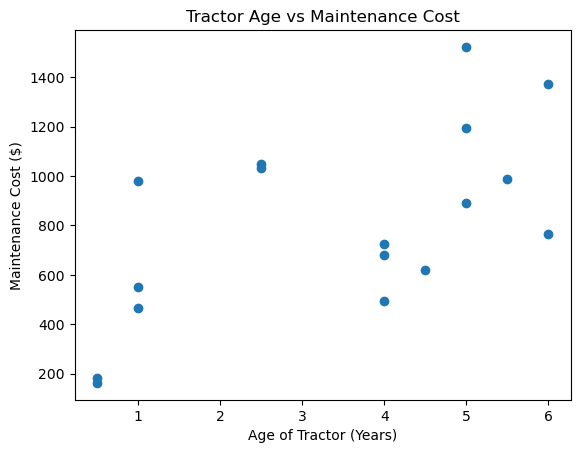

In [7]:
import matplotlib.pyplot as plt

# plots x(regressors/predictors) and y (response) axes and points from tractor.csv
x = dFrame['age']
y = dFrame['cost']
plt.scatter(x, y)
plt.xlabel('Age of Tractor (Years)')
plt.ylabel('Maintenance Cost ($)')
plt.title('Tractor Age vs Maintenance Cost')
plt.show()

**(c)** Using regression to fit the model:
$$\text{cost}=\beta_0+\beta_1 \text{age}$$
in two different ways.

Firstly, use python's bulit-in linear regression solver.

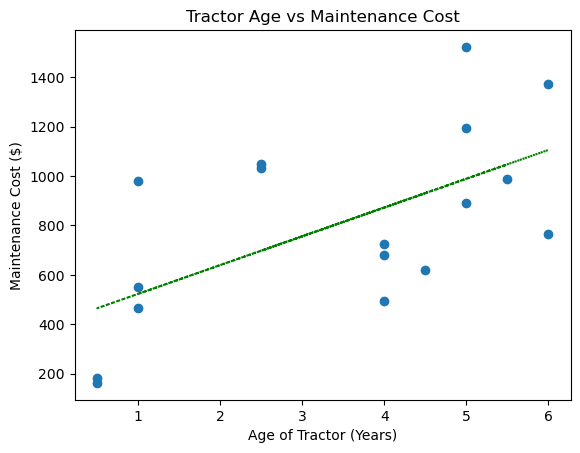

r:  0.6111289259649323
p-value:  0.009152236003646468
Intercept:  407.1169671752196
Slope:  116.3277854831253


In [9]:
from scipy import stats

beta_1, beta_0, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return beta_0 + beta_1 * x

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel,'g:')
plt.xlabel('Age of Tractor (Years)')
plt.ylabel('Maintenance Cost ($)')
plt.title('Tractor Age vs Maintenance Cost')
plt.show()

print('r: ', r)
print('p-value: ', p)
print('Intercept: ', beta_0)
print('Slope: ', beta_1)

Secondly, use close form solution of least square.

r:  0.6111289259649323
p-value:  0.009152236003646468
Intercept:  407.1169671752196
Slope:  116.3277854831253


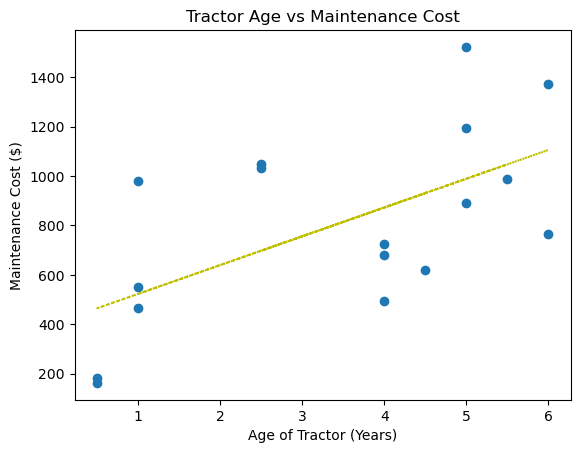

In [13]:
import pandas as pd
import numpy as np
from numpy import dot
from scipy import linalg

dFrame = pd.read_csv('tractor.csv')
x = dFrame['age']
y = dFrame['cost']

X = np.column_stack((np.ones(len(x)), x))

temp1 = linalg.inv(dot(X.T, X))
temp2 = dot(X.T, y)
beta = dot(temp1,temp2)

plt.scatter(x,y)
plt.plot(x, beta_0 + beta_1 * x, 'y:')
plt.xlabel('Age of Tractor (Years)')
plt.ylabel('Maintenance Cost ($)')
plt.title('Tractor Age vs Maintenance Cost')

print('r: ', r)
print('p-value: ', p)
print('Intercept: ', beta_0)
print('Slope: ', beta_1)

**(d)** Add both fitted lines (in different color/style) to the scatterplot. They should give you the same solution.

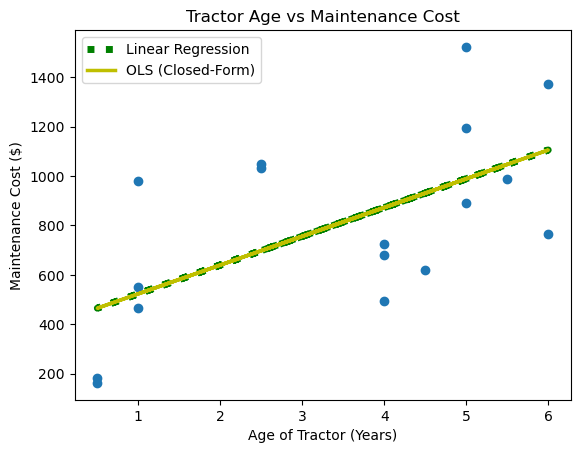

Linear Regression
r:  0.6111289259649323
p-value:  0.009152236003646468
Intercept:  407.1169671752196
Slope:  116.3277854831253

OLS (Closed-Form)
r:  0.6111289259649323
p-value:  0.009152236003646468
Intercept:  407.11696717521954
Slope:  116.32778548312535


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import dot
from scipy import linalg, stats

# open and read the csv file with pandas
dFrame = pd.read_csv('tractor.csv')
x = dFrame['age']
y = dFrame['cost']

# plot points
plt.scatter(x, y)

# LR
beta_1, beta_0, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return beta_0 + beta_1 * x

mymodel = list(map(myfunc, x))

plt.plot(x, mymodel, 'g:', label='Linear Regression', linewidth=5)

# OLS
X = np.column_stack((np.ones(len(x)), x))

temp1 = linalg.inv(dot(X.T, X))
temp2 = dot(X.T, y)
betaOLS = dot(temp1, temp2)

beta_0OLS = betaOLS[0]
beta_1OLS = betaOLS[1]

plt.plot(x, beta_0OLS + beta_1OLS * x, 'y', label='OLS (Closed-Form)', linewidth=2.5)

plt.xlabel('Age of Tractor (Years)')
plt.ylabel('Maintenance Cost ($)')
plt.title('Tractor Age vs Maintenance Cost')
plt.legend()
plt.show()

# print regression vaules for LR and OLS
print('Linear Regression')
print('r: ', r)
print('p-value: ', p)
print('Intercept: ', beta_0)
print('Slope: ', beta_1)

print('\nOLS (Closed-Form)')
print('r: ', r)
print('p-value: ', p)
print('Intercept: ', beta_0OLS)
print('Slope: ', beta_1OLS)

**(e)** Suppose you are considering buying a tractor  that is three years old, what would you expect your 6-monthly maintenance costs to be?

In [19]:
#LR
# age of the tractor
tractorAge = 3
costLR = beta_0 + beta_1 * tractorAge
print(f'Expected 6 monthly maintenance cost per LR: ${costLR:.2f}')

#OLS
# age of the tractor
tractorAge = 3
# calculation using OLS coefficients to calculate cost
costOLS = beta_0OLS + beta_1OLS * tractorAge
print(f'Expected 6 monthly maintenance cost per OLS: ${costOLS:.2f}')

Expected 6 monthly maintenance cost per LR: $756.10
Expected 6 monthly maintenance cost per OLS: $756.10


**Type your answer here**: If you buy a tractor that is 3 years old you can expect the 6 monthly maintenance to be $756.10.

## Question 2
### Part 1
Let's generate a synthetic dataset for regression! It should have m = 150 data points and each has n = 75 dimensions (features).

**(a)** Set the random seed to be 0.

In [23]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

**(b)** Let $X\in\mathbb{R}^{m\times n}$ be a random matrix using *numpy.random.rand()* function.

In [26]:
m = 150
n = 75
x = np.random.rand(m,n)

**(c)** Set the first 10 components of $\hat{\beta}$ to be some random values between $-10$ and $10$, and all the other components to zero. 

Hint: Read what *numpy.random.rand()* generates, and how you generate random numbers in a different interval.

In [29]:
# init. beta values to zeroes
betaWithDaHat = np.zeros(n)

# make the first 10 elements a random number btw -10 and 10
betaWithDaHat[:10] = -10 + 20 * np.random.rand(10)

# check
print(betaWithDaHat)

[-3.33907048 -4.30102186 -2.64543987 -8.47634449 -5.47961583  0.30633366
  9.83226175 -1.68473976 -1.73815895 -4.31755851  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]


**(d)** Compute $Y=X\hat{\beta}+\varepsilon$ where $\varepsilon\in\mathbb{R}^{m\times 1}$ is a random noise vector generated using *numpy.random.randn()* with mean 0 and standard deviation 0.1.


Beta estimated: 
 [-3.33907048 -4.30102186 -2.64543987 -8.47634449 -5.47961583  0.30633366
  9.83226175 -1.68473976 -1.73815895 -4.31755851  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]

Noise is: 
 [0.0557721  0.08598699 0.06693857 0.09986837 0.09452764 0.08433587
 0.00417525 0.07547686 0.06158836 0.07458146 0.09774542 0.02204747
 0.03613

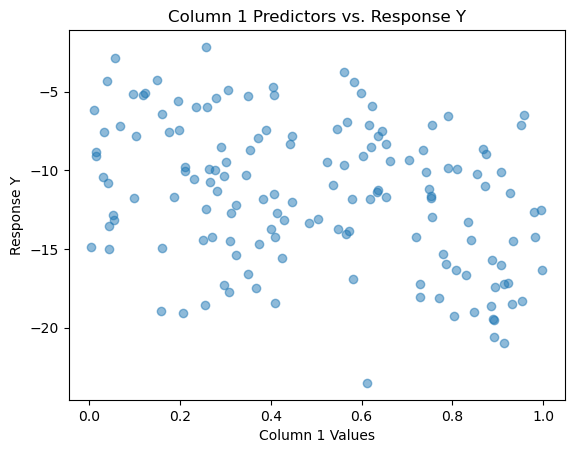

In [32]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

np.random.seed(0)

m = 150
n = 75
x = np.random.rand(m,n)

# init. beta values to zeroes
betaWithDaHat = np.zeros(n)

# make the first 10 elements a random number btw -10 and 10
betaWithDaHat[:10] = -10 + 20 * np.random.rand(10)

# checks
'''
print(m)
print(n)
print(x)
'''
# further checks just because :)
print('\nBeta estimated: \n', betaWithDaHat)

# answer to part d
noise = np.random.rand(m) * 0.1
print('\nNoise is: \n', noise) #check
y = x.dot(betaWithDaHat) + noise
print('\nY is: \n', y) #check
print('\nComputed values with linear regression formula: \n', y) #check

# more fun for no reason
plt.scatter(x[:, 0], y, alpha=0.5)
plt.title("Column 1 Predictors vs. Response Y")
plt.xlabel("Column 1 Values")
plt.ylabel("Response Y")
plt.show()

Note that the problem we generated here implicitly assume the interception (i.e., $\beta_0$ in textbook) is 0. 

### Part 2
We know the problem we generated above has a sparse solution. So we should solve it with lasso regression. Assume the user has the prior knowledge about the interception is 0. This we don't have to add the column of 1 in front of $X$.

**(a)** Solve the lasso regression problem with $\lambda=0.00001$.

In [36]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.00001)
lasso_reg.fit(x,y)
print(lasso_reg.coef_)

[-3.34107973e+00 -4.30719118e+00 -2.65775724e+00 -8.48294149e+00
 -5.47644029e+00  3.03797561e-01  9.82791369e+00 -1.68292989e+00
 -1.72992309e+00 -4.31115413e+00 -2.35454440e-02  7.62620879e-03
 -4.81958381e-03 -1.11683639e-02  6.41605491e-03  1.38833614e-02
 -2.65977618e-02 -3.65899115e-02 -2.27707778e-03 -3.05652103e-03
 -3.26666902e-02 -1.80512216e-02  6.85328133e-03 -9.86765713e-03
  1.22673300e-02  6.04414109e-03 -2.43735446e-02 -3.11872729e-03
 -3.40823262e-03 -2.29145409e-06 -2.58805098e-02  3.43668042e-02
  9.18519916e-03  2.05407546e-02  6.26753982e-03  2.39758494e-03
  2.28220936e-02  9.98433316e-03 -1.97071658e-02 -2.70582307e-02
 -1.05742737e-02  1.21333172e-02 -9.42216682e-04 -2.87351843e-03
 -9.96229277e-03  1.35671553e-03  9.14013554e-03 -3.62843325e-02
 -7.23616044e-03 -1.28619302e-02 -5.49990669e-03 -2.76354039e-04
 -1.58357036e-02 -2.16604621e-03  8.35761052e-03 -8.26836951e-04
  5.20491929e-03 -8.69246700e-03  5.43021716e-04 -9.75693458e-03
 -2.66095323e-02  3.79392

**(b)** Use 10-folder cross validation to find the best regularization parameter between $0$ and $1$.

In [39]:
import sklearn.model_selection as ms
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso
import numpy as np

lambdaRange = np.linspace(0.00001,1,100)
lambdaGrid = [{'alpha': lambdaRange}] 
lasso = Lasso(fit_intercept = False)

lassoCV = GridSearchCV(estimator = lasso, param_grid = lambdaGrid, cv=ms.KFold(n_splits = 10))

lassoCV.fit(x,y)

alpha = lassoCV.best_params_['alpha']
print('Best parameter is: ', alpha)

Best parameter is:  0.01011090909090909


**(c)** Solve the lasso regression problem again with the best regularization parameter.

In [41]:
from sklearn.linear_model import Lasso

#best lambda (alpha) from cross-validation
bestLambda = 0.01011090909090909

#fit Lasso regression with the best regularization parameter
bestParameter = Lasso(alpha = bestLambda) #bestParameter = Beta est
bestParameter.fit(x, y)

# estimated coefficients
print(bestParameter.coef_)

[-3.23760359 -4.15600014 -2.53817078 -8.33044122 -5.36374083  0.16238312
  9.69473575 -1.57713027 -1.58621226 -4.20995956 -0.         -0.
  0.         -0.          0.          0.         -0.         -0.
 -0.          0.          0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
  0.          0.          0.          0.         -0.         -0.
  0.          0.         -0.          0.          0.         -0.
  0.          0.         -0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.          0.         -0.
 -0.         -0.          0.         -0.          0.          0.
  0.         -0.         -0.          0.         -0.          0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]


**(d)** Compare the estimated $\beta_{\text{est}}$ with the ground truth $\hat{\beta}$ by computing $\|\beta_{\text{est}}-\hat{\beta}\|_2$. The distance should be small.

In [45]:
import numpy as np

betaEst = bestParameter.coef_
betaTrue = betaWithDaHat

#eudclidean distance
l2Norm = np.linalg.norm(betaEst - betaTrue, 2)

#check
print('Euclidean distance = ', l2Norm)

Euclidean distance =  0.4042629920514976


In [47]:
#Further testing for fun :D and verifying part d

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#fit Lasso model on training set
lasso_best = Lasso(alpha=bestLambda, fit_intercept=False)
lasso_best.fit(X_train, y_train)

#predictions on the test set
mymodel = lasso_best.predict(X_test)

#evaluate using mean squared error and R^2 score
mse = mean_squared_error(y_test, mymodel)
r2 = r2_score(y_test, mymodel)

print("Mean Squared Error on test set: ", mse)
print("R^2 Score on test set: ", r2)

#MSE is low and r^2 is high so Lasso is effective

Mean Squared Error on test set:  0.016959836654848192
R^2 Score on test set:  0.9993000386050966


## Question 3
In 1988, US cattle producers voted on whether or not to each pay a dollar per head towards the marketing campaigns of the American Beef Council. To understand the vote results, the Montana state cattlemen's association looked at the effect of the physical size of the farm and the value of the farms' gross revenue on voter preference. *beef.csv* consist of the vote results (YES in %), average SIZE of farm (in hundred acres), and average VAL of products sold annually by each farm (in thousand dollors) for each of Montana’s 56 counties.

**(a)** Read the data file.

In [50]:
import pandas as pd

#open and read the csv file with pandas
dFrame = pd.read_csv('beef.csv')

#print the first few rows of the csv table to check file can be opened and read
print(dFrame.head())

    YES  SIZE  VAL
0  85.9  45.2  122
1  65.0  58.5  121
2  74.9  52.5   81
3  72.5  24.0   74
4  76.6  10.5   54


**(b)** Use Multivariate Linear Regression to fit YES with SIZE and log(VAL) as the regressors.

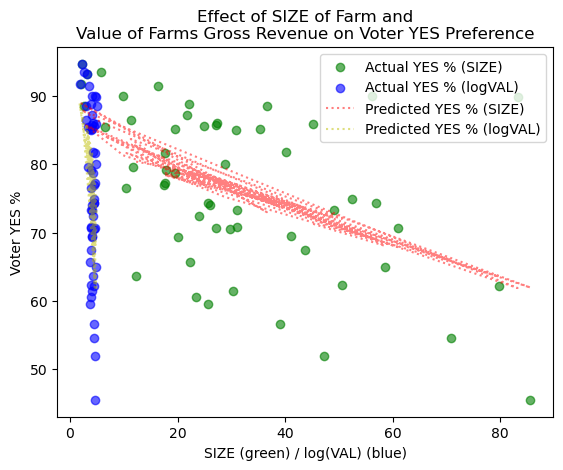

Beta is:  [93.71444908 -0.24275006 -2.38614319]
P-value is:  0.009152236003646468
R is:  0.6111289259649323


In [53]:
#I know I did more than MLR for this question but I wanted to test some versions out.
#Test 1
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

x1 = dFrame['SIZE']
x2 = np.log(dFrame['VAL'])
y = dFrame['YES']

X = np.column_stack((np.ones(len(x1)), x1, x2))

temp1 = linalg.inv(np.dot(X.T, X)) #(X^T * X)^−1
temp2 = np.dot(X.T, y)             #X^T * y
beta = np.dot(temp1,temp2)

beta_0 = beta[0]  #intercept
beta_1 = beta[1]  #coefficient for x1 (SIZE)
beta_2 = beta[2]  #coefficient for x2 (logVAL)

def myfunc(x1, x2):
    return beta_0 + beta_1 * x1 + beta_2 * x2

mymodel = myfunc(x1,x2)

plt.scatter(x1, y, color='green', label = 'Actual YES % (SIZE)', alpha = 0.6)
plt.scatter(x2, y, color='blue', label = 'Actual YES % (logVAL)', alpha = 0.6)

plt.plot(x1, mymodel, 'r:', label = 'Predicted YES % (SIZE)', alpha=0.5)
plt.plot(x2, mymodel, 'y:', label = 'Predicted YES % (logVAL)', alpha=0.5)

plt.xlabel('SIZE (green) / log(VAL) (blue)')
plt.ylabel('Voter YES %')
plt.title('Effect of SIZE of Farm and\nValue of Farms Gross Revenue on Voter YES Preference')
plt.legend()
plt.show()

print('Beta is: ', beta)
print('P-value is: ', p)
print('R is: ', r)

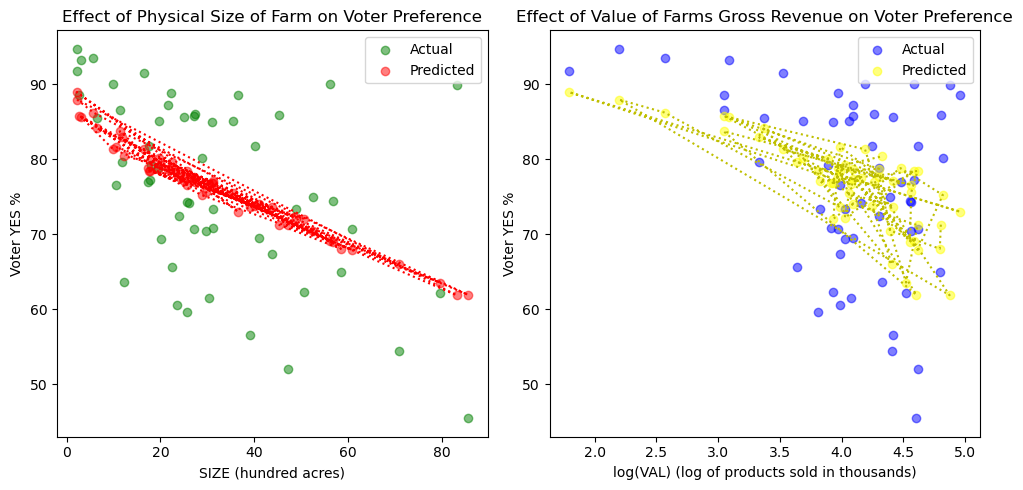

Beta is:  [93.71444908 -0.24275006 -2.38614319]
P-value is:  0.009152236003646468
R is:  0.6111289259649323


In [55]:
#Test 2
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

x1 = dFrame['SIZE']
x2 = np.log(dFrame['VAL'])
y = dFrame['YES']

X = np.column_stack((np.ones(len(x1)), x1, x2))

temp1 = linalg.inv(np.dot(X.T, X))
temp2 = np.dot(X.T, y)
beta = np.dot(temp1,temp2)

beta_0 = beta[0]  #intercept
beta_1 = beta[1]  #coefficient for x1 (SIZE)
beta_2 = beta[2]  #coefficient for x2 (logVAL)

def myfunc(x1, x2):
    return beta_0 + beta_1 * x1 + beta_2 * x2

mymodel = myfunc(x1, x2)

#scatterplot for SIZE
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.scatter(x1, y, color='green', label='Actual', alpha = 0.5)
plt.scatter(x1, mymodel, color='red', label='Predicted', alpha=0.5)
plt.plot(x1, mymodel, 'r:')
plt.xlabel('SIZE (hundred acres)')
plt.ylabel('Voter YES %')
plt.title('Effect of Physical Size of Farm on Voter Preference')
plt.legend()

#scatterplot for log(VAL)
plt.subplot(1, 2, 2)
plt.scatter(x2, y, color='blue', label='Actual', alpha = 0.5)
plt.scatter(x2, mymodel, color='yellow', label='Predicted', alpha=0.5)
plt.plot(x2, mymodel, 'y:')
plt.xlabel('log(VAL) (log of products sold in thousands)')
plt.ylabel('Voter YES %')
plt.title('Effect of Value of Farms Gross Revenue on Voter Preference')
plt.legend()

plt.tight_layout()
plt.show()

print('Beta is: ', beta)
print('P-value is: ', p)
print('R is: ', r)

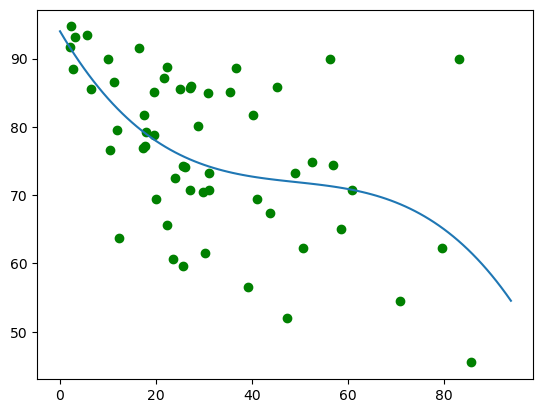

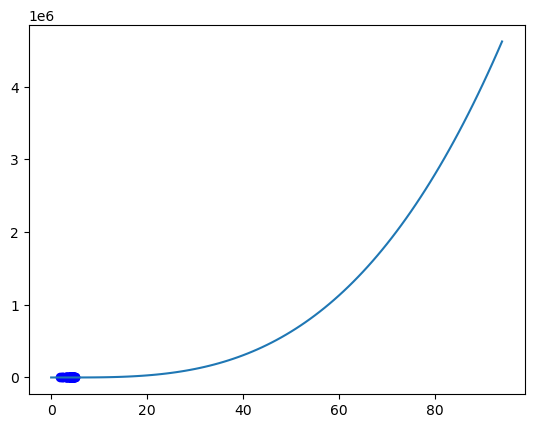

Beta is:  [93.71444908 -0.24275006 -2.38614319]
P-value is:  0.009152236003646468
R is:  0.6111289259649323
R^2 score for x1:  -5184470480.708911
R^2 score for x2:  0.2545925777135162


In [57]:
#Test 3
import numpy as np
mymodel = np.poly1d(np.polyfit(x1, y, 3))

#plt.scatter(x, y)
plt.scatter(x1, y, color='green')
plt.plot(range(95), mymodel(range(95)))
plt.show()

mymodel = np.poly1d(np.polyfit(x2, y, 3))

#plt.scatter(x, y)
plt.scatter(x2, y, color='blue')
plt.plot(range(95), mymodel(range(95)))
plt.show()

print('Beta is: ', beta)
print('P-value is: ', p)
print('R is: ', r)
print('R^2 score for x1: ', r2_score(y, mymodel(x1)))
print('R^2 score for x2: ', r2_score(y, mymodel(x2)))

**(c)** Is this a good fit? Numerically check via a sutiable statistics test.

**Type your answer here**:
No, this is not the best fit because for (x1) SIZE, it is a moderate, somewhat weaker, fit and (x2) logVAL is a worse fit. 

Beta Coefficients: explain the relationship between the variables and the respons .
The intercept β0 = 93.714 shows a high ‘YES’ vote percenta e.
The coefficient for SIZE, β1 = -0.242, suggests larger farms are slightly less likely to vote yes for the marketing campaigns of the American Beef Coun il.
The coefficient for logVAL, β2 = -2.386, shows that higher-revenue farms are much less likely to support the marketing campaigns of the American Beef Council.

P-value: supports that these relationships are not due to random  hance.
The p-value 2.73 is very low, meaning the model is statistically significant, and both SIZE and log(VAL) have a reliable effect on the ‘YES’ vote percentage. These predictors are relevant, even if their fit to the data varies.

Correlatioe Cefficirnt s and R^2 Scores: clarifies SIZE is a reasonable predictor but logVAL is not fitting well with the lin ar model.
The correlation coefficient r = 0.62 imedium a m, erate fit. meaning the interaction between SIZE and logVAL explains some of the variance in the YES %.
R^2 for SIZE = 0.29, shows farm size explains about 30% of the variabili y in votes.
R^2 for logVAL = -1.1, indicates a poor fit, possibly due to complex relationship or non-linear pattern.outliers.

**(d)** In this dataset, what fact may potentially be a probelm for our regression analysis?

Hint: Does the effect of SIZE change depending on log(VAL)?

**Type your answer here**:
The interaction between SIZE and logVAL might be a problem because the effect of SIZE on the percentage of YES votes may change depending on the value of logVAL. If the relationship between SIZE and YES % depends on logVAL, a linear regression may not be the best model to fit the data because linear regression assumes independent effects for SIZE and logVAL. So if there is an interaction between the two factors, the model will not accurately capture the true relationship between these variables and the outcome. The model may be missing an important factor where the effect of farm size changes depending on revenue. This can cause biased or misleading results, as the model would fail to account for the effect of one variable on the other.